In [1]:
import math
import csv
from collections import Counter
from Bio import AlignIO
import matplotlib.pyplot as plt

In [2]:
# ------------------------------ import MSA ---------------------------------
MSA_abc = AlignIO.read("abc-aln-fasta.txt", "fasta")
#print(MSA_abc)

#AlignIO = 
#Use len(alignment) to get the number of sequences (i.e. the number of rows), 
#and alignment.get_alignment_length() to get the length of the longest sequence (i.e. the number of columns).

In [3]:
# ------------------------------ calculate Shannon entropy ---------------------------------
#H = Shannon entropy
#Pi = fraction of residues of type i
#N = number of residues in the column
#H = -sum(Pi*log2(Pi))

def shannon_entropy(msa):
    num_columns = msa.get_alignment_length()
    H_list = []
    for i in range(num_columns):
        column = [sequence[i] for sequence in msa]
        residue_counts = Counter(column)
        H = 0.0
        total_residues = len(column)
        for count in residue_counts.values():
            pi = count / total_residues
            H -= pi * math.log(pi,2) if pi > 0 else 0
        H_list.append(H)
    return H_list

entropy_abc = shannon_entropy(MSA_abc)

#save as a txt file
with open("entropy_abc.txt", "w") as f:
    for item in entropy_abc:
        f.write("%s\n" % item)

In [4]:
# ------------------------------ calculate Wu-Kabat Variability ---------------------------------
#V = Wu-Kabat variability
#N = total number of different residues in the column
#n = length of the most common residue
#K = number of different amino acids in the column 
        
def wu_kabat(msa):
    num_columns = msa.get_alignment_length()
    wuk_list = []
    for i in range(num_columns):
        column = [sequence[i] for sequence in msa]
        residue_counts = Counter(column)
        n = residue_counts.most_common(1)[0][1] #number of most common residue
        N = len(residue_counts) #total number of residues in the column
        K = sum(residue_counts.values()) #number of different amino acids in the column
        V = (N*K)/n
        wuk_list.append(V)
    return wuk_list

wuk_abc = wu_kabat(MSA_abc)

#save as a txt file
with open("wuk_abc.txt", "w") as f:
    for item in wuk_abc:
        f.write("%s\n" % item)

In [ ]:
# ------------------------------ Calculate Simpson diveristy --------------------------------- 
#D = Simpson diversity
#ni = number of residues of type i
#N = total number of residues in the column
# D = 1 - sum(ni(ni-1))/(N(N-1))
        
def simpson_diversity(msa):
    num_columns = msa.get_alignment_length() #number of columns in the alignment
    simpson_list = []
    for i in range(num_columns):
        column = [sequence[i] for sequence in msa]
        residue_counts = Counter(column)
        N = sum(residue_counts.values())  # total number of residues in the column
        ni = list(residue_counts.values()) # number of residues of type i
        D = 1 - sum((count * (count - 1)) / (N * (N - 1)) for count in ni)
        simpson_list.append(D)
    return simpson_list

simpson_abc = simpson_diversity(MSA_abc)

#save all lists together as one csv file
with open("conservation_measures.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(zip(entropy_abc, wuk_abc, simpson_abc))

In [5]:
# ------------------------------ Calculate Simpson diveristy --------------------------------- 
#D = Simpson diversity
#ni = number of residues of type i
#N = total number of residues in the column
# D = 1 - sum(ni(ni-1))/(N(N-1))
        
def simpson_diversity(msa):
    num_columns = msa.get_alignment_length() #number of columns in the alignment
    simpson_list = []
    for i in range(num_columns):
        column = [sequence[i] for sequence in msa]
        residue_counts = Counter(column)
        N = sum(residue_counts.values())  # total number of residues in the column
        ni = list(residue_counts.values()) # number of residues of type i
        D = 1 - sum((count * (count - 1)) / (N * (N - 1)) for count in ni)
        simpson_list.append(D)
    return simpson_list

simpson_abc = simpson_diversity(MSA_abc)

#save all lists together as one csv file
with open("conservation_measures.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(zip(entropy_abc, wuk_abc, simpson_abc))

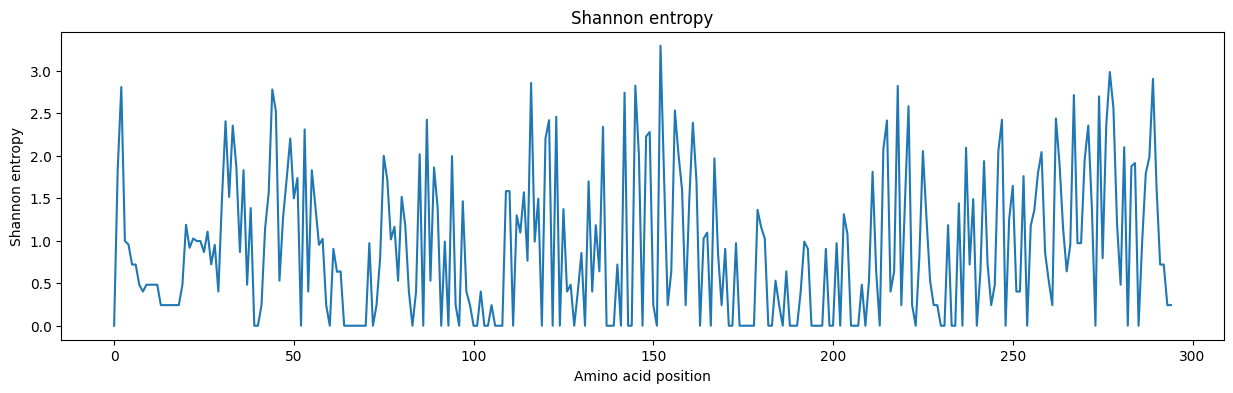

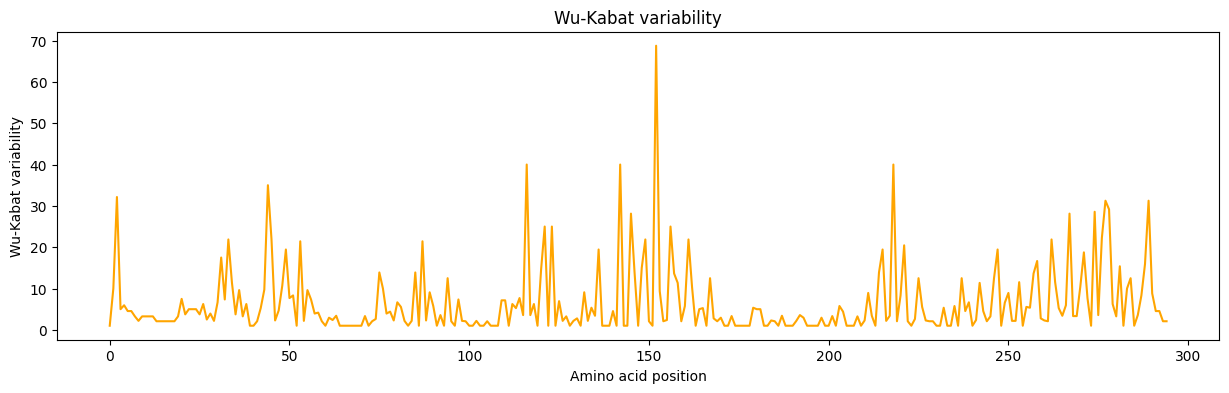

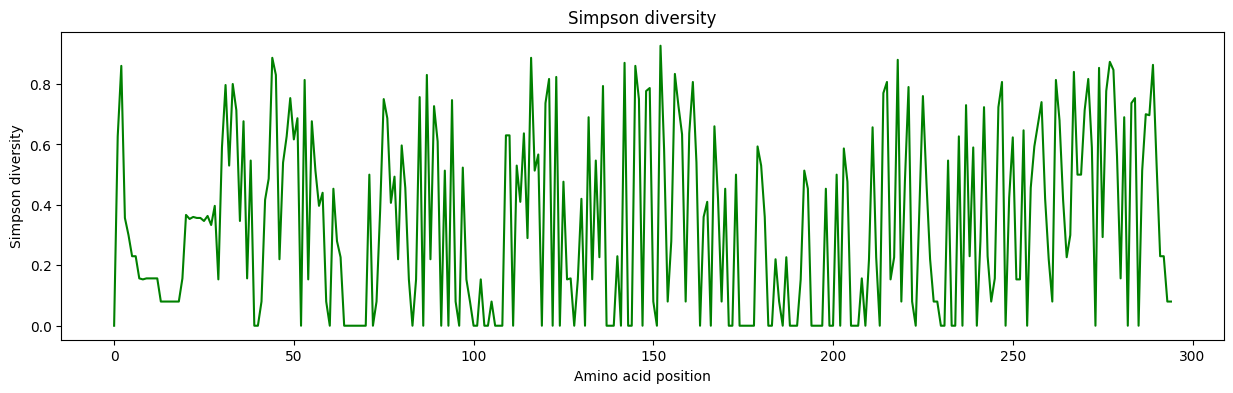

In [7]:
# ------------------------------ plot ---------------------------------
plt.figure(figsize=(15,4))
plt.plot(entropy_abc)
plt.title("Shannon entropy")
plt.xlabel("Amino acid position")
plt.ylabel("Shannon entropy")
plt.show()
#save plot as png

plt.figure(figsize=(15,4))
plt.plot(wuk_abc, color="orange")
plt.title("Wu-Kabat variability")
plt.xlabel("Amino acid position")
plt.ylabel("Wu-Kabat variability")
plt.show()
#save plot as png

plt.figure(figsize=(15,4))
plt.plot(simpson_abc, color="green")
plt.title("Simpson diversity")
plt.xlabel("Amino acid position")
plt.ylabel("Simpson diversity")
plt.show()
#save plot as png